# Films recommendations Chatbot
It is a simple PET project. This Chatbot is designed to provide movie recommendations based on the descriptions of the movie using machine learning. It uses a Tf-idf vectorizer and a KMeans clustering model to generate the recommendations.

# DATA

> https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies/discussion/333870

> https://www.kaggle.com/datasets/shivamb/netflix-shows

> https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows

> https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

> https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows





# CODE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('titles.csv')
df2 = pd.read_csv('netflix_titles.csv')
df3 = pd.read_csv('amazon_prime_titles.csv')
df4 = pd.read_csv('disney_plus_titles.csv')
df5 = pd.read_csv('hulu_titles.csv')

In [5]:
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [6]:
# Выбираем столбец со строками
column = df1["genres"]

# Удаляем ненужные символы из строк
column = column.str.replace("[", "", regex=False)
column = column.str.replace("]", "", regex=False)
column = column.str.replace("'", "", regex=False)

# Заменяем столбец в датафрейме
df1["listed_in"] = column
df1["rating"] = df1["age_certification"]

df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,listed_in,rating
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,documentation,TV-MA
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,"drama, crime",R
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,"drama, action, thriller, european",R
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,"fantasy, action, comedy",PG
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,"war, action",NaN


In [7]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [9]:
df4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [10]:
df5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [11]:
df1['description_len'] = df1['description'].astype(str).apply(len)
df2['description_len'] = df2['description'].astype(str).apply(len)
df3['description_len'] = df3['description'].astype(str).apply(len)
df4['description_len'] = df4['description'].astype(str).apply(len)
df5['description_len'] = df5['description'].astype(str).apply(len)


# Создаем новый датафрейм

In [12]:
# создаем новые датафреймы с названием описанием и годом и тд (type title release_year rating listed_in description)
dfN1 = df1[['type', 'title', 'release_year', 'rating', 'listed_in', 'description', 'description_len']]
dfN2 = df2[['type', 'title', 'release_year', 'rating', 'listed_in', 'description', 'description_len']]
dfN3 = df3[['type', 'title', 'release_year', 'rating', 'listed_in', 'description', 'description_len']]
dfN4 = df4[['type', 'title', 'release_year', 'rating', 'listed_in', 'description']]
dfN5 = df5[['type', 'title', 'release_year', 'rating', 'listed_in', 'description', 'description_len']]
print(dfN1.head(2))
print(dfN2.head(2))
print(dfN3.head(2))
print(dfN4.head(2))
print(dfN5.head(2))

    type                                title  release_year rating  \
0   SHOW  Five Came Back: The Reference Films          1945  TV-MA   
1  MOVIE                          Taxi Driver          1976      R   

       listed_in                                        description  \
0  documentation  This collection includes 12 World War II-era p...   
1   drama, crime  A mentally unstable Vietnam War veteran works ...   

   description_len  
0              151  
1              165  
      type                 title  release_year rating  \
0    Movie  Dick Johnson Is Dead          2020  PG-13   
1  TV Show         Blood & Water          2021  TV-MA   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  description_len  
0  As her father nears the end of his life, filmm...              152  
1  After crossing paths at a part

In [13]:
# Объединяем датафреймы
df = pd.concat([dfN1, dfN2, dfN3, dfN4, dfN5])
print(df['description'].value_counts().size)
print(df['title'].value_counts().size)

print('------------------')

# Удаляем строки с повторяющимися значениями в колонке "description"
df.drop_duplicates(subset=['description'], inplace=True)
print(df['description'].value_counts().size)
print(df['title'].value_counts().size)

print('------------------')

# Удаляем строки с повторяющимися значениями в колонке "title"
df.drop_duplicates(subset=['title'], inplace=True)
print(df['description'].value_counts().size)
print(df['title'].value_counts().size)

27315
23842
------------------
27315
23395
------------------
23394
23395


In [14]:
df["type"] = df["type"].str.lower()
df["title"] = df["title"].str.lower()
df["listed_in"] = df["listed_in"].str.lower()
df.head(5)

,type,title,release_year,rating,listed_in,description,description_len
0,show,five came back: the reference films,1945,TV-MA,documentation,This collection includes 12 World War II-era p...,151.0
1,movie,taxi driver,1976,R,"drama, crime",A mentally unstable Vietnam War veteran works ...,165.0
2,movie,deliverance,1972,R,"drama, action, thriller, european",Intent on seeing the Cahulawassee River before...,213.0
3,movie,monty python and the holy grail,1975,PG,"fantasy, action, comedy","King Arthur, accompanied by his squire, recrui...",415.0
4,movie,the dirty dozen,1967,NaN,"war, action",12 American military prisoners in World War II...,302.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d23d60ac0>]],
      dtype=object)

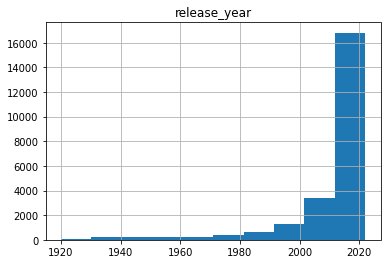

In [15]:
df.hist(column='release_year')

In [16]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-NR': 'Adults',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    '7+': 'Older Kids',
    '13+': 'Teens',
    '16+': 'Teens',
    '18+': 'Adults',
    'ALL': 'All',
    'UNRATED': 'All',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Adults', 'Older Kids', nan, 'Teens', 'Kids', '74 min', '66 min',
       'All', '16', 'AGES_18_', 'AGES_16_', 'ALL_AGES', 'NOT_RATE',
       'NOT RATED', '2 Seasons', '4 Seasons', '136 min', '91 min',
       '93 min', '85 min', '98 min', '89 min', '94 min', '86 min',
       '3 Seasons', '121 min', '88 min', '101 min', '1 Season', '83 min',
       '100 min', '95 min', '96 min', '109 min', '99 min', '75 min',
       '92 min', '87 min', '67 min', '104 min', '107 min', '84 min',
       '103 min', '119 min', '114 min', '90 min', '130 min', '82 min',
       '80 min', '6 Seasons', '97 min', '111 min', '49 min', '45 min',
       '41 min', '73 min', '40 min', '36 min', '39 min', '34 min',
       '47 min', '65 min', '37 min', '78 min', '102 min', '115 min',
       '112 min', '105 min', '61 min', '76 min', '79 min', '157 min',
       '28 min', '64 min', '7 min', '5 min', '127 min', '142 min',
       '110 min', '108 min', '77 min', '57 min', '118 min', '116 min',
       '81 min', '106 min',

In [17]:
counts = df['target_ages'].value_counts()
counts[:10]

Teens         7213
Adults        6456
Older Kids    3300
Kids          1610
All           1173
1 Season        39
89 min           9
2 Seasons        8
90 min           8
91 min           8
Name: target_ages, dtype: int64

In [18]:
df.head(3)

,type,title,release_year,rating,listed_in,description,description_len,target_ages
0,show,five came back: the reference films,1945,TV-MA,documentation,This collection includes 12 World War II-era p...,151.0,Adults
1,movie,taxi driver,1976,R,"drama, crime",A mentally unstable Vietnam War veteran works ...,165.0,Adults
2,movie,deliverance,1972,R,"drama, action, thriller, european",Intent on seeing the Cahulawassee River before...,213.0,Adults


In [19]:
# Создаем словарь для замены значений
replacement_values = {
    value: ' ' for value in df['target_ages'].unique() if value not in ['Teens', 'Adults', 'Older Kids', 'Kids', 'All']
}

# Заменяем значения в колонке 'column'
df['target_ages'].replace(replacement_values, inplace=True)

In [20]:
df['new_description'] = 'This ' + df['type'].str.lower() + ' released in ' + df['release_year'].astype(str) + ' for ' + df['target_ages'].str.lower() + 'can be classified into the following categories: ' + df['target_ages'].str.lower() + '. The description is: ' + df['description'].str.lower()

# CountVectorizer

In [21]:
# Импортируем необходимые библиотеки
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
# Создаем матрицу слов для описаний фильмов и сериалов
count = CountVectorizer()
df['new_description'].fillna('', inplace=True)
count_matrix = count.fit_transform(df['new_description'])

# Вычисляем матрицу косинусной близости для описаний фильмов и сериалов
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [23]:
# Функция для получения топ-10 похожих описаний
def get_recommendations(title):
    # Получаем индекс фильма или сериала по его названию
    idx = df[df['title'] == title].index[0]

    # Создаем список с названиями фильмов и сериалов, отсортированными по похожести с выбранным фильмом
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    # Получаем названия фильмов и сериалов с наибольшей похожестью
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

Проверим на фильме Taxi Driver

> Результат самой первой версией модели

        1. Tear Along the Dotted Line
        2. Barry
        3. Turbo FAST
        4. Seinfeld
        5. Inventing David Geffen
        6. Marvel's Daredevil
        7. Black Butler
        8. The Originals
        9. A Miraculous Christmas Special: Tales of Ladybug and Cat Noir
        10. Servant of the People

> Результат предыдущей версии модели

        1. The Only Living Boy in New York
        2. The Last Time
        3. Tear Along the Dotted Line
        4. Barry
        5. Burn Country
        6. Yu-Gi-Oh! 5D's
        7. Turbo FAST
        8. Seinfeld
        9. Inventing David GeffenCat Noir
        10. Caribbean Life

In [24]:
film_result = get_recommendations('taxi driver')
film_result

5014            mobutu's african movie theater: episode 5
7139                                              clip: 1
7957                                        the last time
8597    rammstein: in amerika - live from madison squa...
9557                           date night: world premiere
9558                           date night: making a scene
8093                                         roger dodger
1309                                                barry
8060                                      a distant place
5556                      the only living boy in new york
Name: title, dtype: object

In [25]:
row = df[df['title'] == 'jackass 3.5']

# Print the row
row['description']

693    Johnny Knoxville of 'Jackass' releases unused ...
Name: description, dtype: object

# TFIDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [27]:
# Создаем векторизатор Tf-idf
tfidf = TfidfVectorizer()
df['new_description'].fillna('', inplace=True)
# Векторизуем текстовое описание фильмов
X = tfidf.fit_transform(df['new_description'])

# Обучаем модель KMeans
kmeans = KMeans(n_clusters=10).fit(X)

# Получаем метки кластеров для каждого фильма
cluster_labels = kmeans.labels_

In [28]:
# Создаем функцию для получения топ-10 похожих описаний фильмов
def get_recommendations_k(title):
    # Получаем индекс фильма по его названию
    idx = df[df['title'] == title].index[0]

    # Получаем метку кластера для выбранного фильма
    cluster_label = cluster_labels[idx]

    # Выбираем только те фильмы, у которых такая же метка кластера
    similar_movies = df[cluster_labels == cluster_label]

    # Сортируем фильмы по названию
    sorted_movies = similar_movies.sort_values(by='title')

    # Возвращаем первые 10 фильмов
    return sorted_movies['title']

In [29]:
film_result_tfidf = get_recommendations_k('taxi driver')
film_result_tfidf

3656                       #blackaf
655                      #selfie 69
8852                        #washed
1461                            '71
2738                    (dub) akira
                   ...             
1208                    çarsi pazar
5976    çok filim hareketler bunlar
5975                     ég man þig
7101                           마녀사냥
5022                        반드시 잡는다
Name: title, Length: 4112, dtype: object

In [33]:
 def get_recommendations_new(title):
  if not title in df['title'].values:
    return "Sorry, I don't know this film"
  else:
    # Получаем топ-10 похожих фильмов из кластера
    similar_movies_k = get_recommendations_k(title)
    
    # Получаем индекс фильма по его названию
    idx = df[df['title'] == title].index[0]
    
    # Получаем вектор содержания фильма
    movie_vec = X[idx]
    
    # Считаем косинусную близость вектора фильма с векторами всех остальных фильмов
    cosine_similarities = cosine_similarity(movie_vec, X).flatten()
    
    # Сортируем фильмы по близости
    related_docs_indices = cosine_similarities.argsort()[:-11:-1]
    
    # Получаем названия фильмов
    similar_movies = df.iloc[related_docs_indices]['title']
    
    # Выбираем только те фильмы, которые не входят в топ-10 похожих фильмов из кластера
    similar_movies = similar_movies[~similar_movies.isin(similar_movies_k)]

    res = '🎦 Based on the analysis of the description of this film, I think you may be interested in the following films:\n'
    for i in similar_movies:
      res += '🎬 ' + i + '\n'
    return res

In [34]:
film_result_new = get_recommendations_new('taxi driver')
film_result_new

"🎦 Based on the analysis of the description of this film, I think you may be interested in the following films:\n🎬 mom behind the wheel\n🎬 we'll be right back after the break\n🎬 da 5 bloods\n🎬 the beast\n🎬 sir! no sir!\n"

In [ ]:
# Еще один способ для генерации рекоммендаций


# Получаем список похожих фильмов из кластера для выбранного фильма
similar_movies_list = get_recommendations_k('Taxi Driver')

# Получаем топ-10 похожих описаний на основе матрицы косинусной близости для каждого фильма из списка similar_movies_list
recommendations = []
for movie in similar_movies_list:
    recommendations.extend(get_recommendations(movie))

# Выводим топ-10 похожих описаний
print(recommendations[:10])

# The main code of telegram bot

**Importing and installing necessary libraries**

In [2]:
!pip install python-telegram-bot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 519 kB 15.3 MB/s 
     |████████████████████████████████| 58 kB 7.0 MB/s 
     |████████████████████████████████| 427 kB 52.1 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=6.0.4, but you have tornado 6.1 which is incompatible.


In [32]:
from telegram.ext import Updater, Filters, CommandHandler, MessageHandler

In [ ]:
def start(updater, context): 
	updater.message.reply_text("👋 Welcome to the Bot! This chatbot generates recommendations for films and TV shows from the name of the film using machine learning. This recommendation system for movies is using Tf-idf vectorizer and KMeans clustering model. \n\nJust send the film's name")

def help_(updater, context): 
	updater.message.reply_text("🖼This Chat Bot is only for film's recomendations.\nJust send the film's name 💌")

def message(updater, context):
  msg = updater.message.text
  print(msg)
  msg = msg.lower()
  film_result_new = get_recommendations_new(msg)
  updater.message.reply_text(film_result_new)


updater = Updater("---TOKEN---")
dispatcher = updater.dispatcher

dispatcher.add_handler(CommandHandler("start", start))
dispatcher.add_handler(CommandHandler("help", help_))

dispatcher.add_handler(MessageHandler(Filters.text, message))

updater.start_polling()
updater.idle()

Die Hard
emily in paris
emily
die hard 2
Die hard 2
How I met your mother
pulp fiction
the sixth sense
Vikings
the sixth sense
Cars
Film with Mark Wahlberg
glass
Shrek
